In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
import time
import matplotlib.pyplot as plt

%matplotlib inline

inputData = pd.read_csv(
    '/Users/sugandhgupta/Downloads/Bitfinex_BTCEUR_trades_2018_02_02.csv')
print("-----Original Data-----\n")
print(inputData.head())

print(f"\nMetadata about the dataset:\n\n Number of Rows: {len(inputData)}")
print(f" Number of unique IDs: {inputData['id'].nunique()}")
print(f" Number of unique Dates: {inputData['date'].nunique()}")
print(f" Number of unique Prices: {inputData['price'].nunique()}")
print(f" Number of unique Amounts: {inputData['amount'].nunique()}\n")

print(f" Maximum date: {inputData['date'].max()}")
print(f" Maximum price: {inputData['price'].max()}")
print(f" Maximum amount: {inputData['amount'].max()}\n")

print(f" Minimum date: {inputData['date'].min()}")
print(f" Minimum price: {inputData['price'].min()}")
print(f" Minimum amount: {inputData['amount'].min()}")

del inputData['symbol']
del inputData['exchange']

#rename column headers + date + truncate columns
print("\n-----Formatted Data-----\n")
inputData = inputData.rename(columns={'id':'ID', 'date': 'DATE', 'price': 'PRICE',
                            'amount':'AMOUNT', 'sell':'SELL'})
inputData['NEW_DATE'] = inputData['DATE']/1000
inputData['DT'] = inputData['NEW_DATE'].map(lambda val: datetime.datetime.
                                                  fromtimestamp(val).
                                                   strftime('%Y-%m-%d'))
inputData['TIME'] = inputData['NEW_DATE'].map(lambda val: datetime.datetime.
                                                  fromtimestamp(val).
                                                   strftime('%H:%M:%S'))
inputData['DAY'] = inputData['NEW_DATE'].map(lambda val: datetime.datetime.
                                                  fromtimestamp(val).
                                                   strftime('%A'))
del inputData['DATE']
del inputData['NEW_DATE']

print(inputData.head())

-----Original Data-----

          id exchange  symbol           date       price    amount   sell
0  183601815       bf  btceur  1517529608000  7349.60000  0.004568  False
1  183601825       bf  btceur  1517529609000  7354.68045  0.010000   True
2  183601823       bf  btceur  1517529609000  7354.68045  0.004568   True
3  183601833       bf  btceur  1517529610000  7354.60000  0.102395  False
4  183601904       bf  btceur  1517529626000  7343.40750  0.086580  False

Metadata about the dataset:

 Number of Rows: 15715
 Number of unique IDs: 15715
 Number of unique Dates: 8161
 Number of unique Prices: 6915
 Number of unique Amounts: 8859

 Maximum date: 1517615973000
 Maximum price: 7381.8
 Maximum amount: 50.0

 Minimum date: 1517529608000
 Minimum price: 6377.0
 Minimum amount: 1.04e-06

-----Formatted Data-----

          ID       PRICE    AMOUNT   SELL          DT      TIME     DAY
0  183601815  7349.60000  0.004568  False  2018-02-02  02:00:08  Friday
1  183601825  7354.68045  0.010


----- Sell 03 before 2 pm -----

              ID        PRICE    AMOUNT  SELL          DT      TIME       DAY
15051  185023645  6904.057104  0.072662  True  2018-02-03  00:00:59  Saturday
15052  185023689  6904.057104  1.000000  True  2018-02-03  00:01:01  Saturday
15053  185023697  6904.057104  0.288903  True  2018-02-03  00:01:01  Saturday
15054  185023763  6904.057104  1.500000  True  2018-02-03  00:01:05  Saturday
15055  185023795  6904.057104  0.673866  True  2018-02-03  00:01:09  Saturday

----- Buy 03 before 2 pm -----

              ID   PRICE    AMOUNT   SELL          DT      TIME       DAY
15065  185024763  6899.7  0.363327  False  2018-02-03  00:01:54  Saturday
15066  185024873  6899.1  0.044404  False  2018-02-03  00:01:55  Saturday
15067  185024963  6899.1  0.002521  False  2018-02-03  00:01:56  Saturday
15069  185025123  6894.2  0.214071  False  2018-02-03  00:01:58  Saturday
15071  185025258  6893.5  0.205666  False  2018-02-03  00:02:00  Saturday

----- Sell 02 before

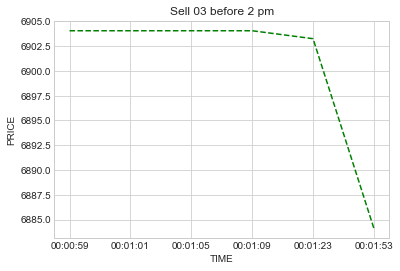

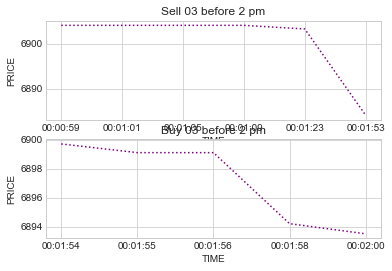

In [76]:
#segregating based on buying-selling sentiment on both days
sell_03b = inputData[(inputData['DT'] > '2018-02-02') & (inputData['SELL'] == True)
                   & (inputData['TIME'] < '02:00:00')]
print("\n----- Sell 03 before 2 pm -----\n")
print(sell_03b.head())
sell_03b.set_index('ID', inplace=True)

fig = plt.figure()
x1 = sell_03b['TIME'].head(10)
y1 = sell_03b['PRICE'].head(10)

plt.plot(x1, y1, '-', label='price1',color='green', linestyle='--')
plt.title("Sell 03 before 2 pm")
plt.xlabel("TIME")
plt.ylabel("PRICE")
fig.savefig('sell_03b')

buy_03b = inputData[(inputData['DT'] > '2018-02-02') & (inputData['SELL'] == False)
                  & (inputData['TIME'] < '02:00:00')]
print("\n----- Buy 03 before 2 pm -----\n")
print(buy_03b.head())

plt.figure()
x2 = buy_03b['TIME'].head()
y2 = buy_03b['PRICE'].head()

plt.subplot(2, 1, 1)
plt.plot(x1, y1, label='price2',color='purple', linestyle=':')
plt.title("Sell 03 before 2 pm")
plt.xlabel("TIME")
plt.ylabel("PRICE")


plt.subplot(2, 1, 2)
plt.plot(x2, y2, label='price3',color='purple', linestyle=':')
plt.title("\n\n\nBuy 03 before 2 pm")
plt.xlabel("TIME")
plt.ylabel("PRICE")
fig.savefig('buy_03b')

sell_02b = inputData[(inputData['DT'] < '2018-02-03') & (inputData['SELL'] == True)
                   & (inputData['TIME'] < '02:00:00')]
print("\n----- Sell 02 before 2 pm -----\n")
print(sell_02b)

buy_02b = inputData[(inputData['DT'] < '2018-02-03') & (inputData['SELL'] == False)
                  & (inputData['TIME'] < '02:00:00')]
print("\n----- Buy 02 before 2 pm -----\n")
print(buy_02b)


----- Sell 03 after 2 pm -----

Empty DataFrame
Columns: [ID, PRICE, AMOUNT, SELL, DT, TIME, DAY]
Index: []

----- Buy 03 after 2 pm -----

Empty DataFrame
Columns: [ID, PRICE, AMOUNT, SELL, DT, TIME, DAY]
Index: []

----- Sell 02 after 2 pm -----

           ID       PRICE    AMOUNT  SELL          DT      TIME     DAY
1   183601825  7354.68045  0.010000  True  2018-02-02  02:00:09  Friday
2   183601823  7354.68045  0.004568  True  2018-02-02  02:00:09  Friday
10  183602333  7352.28195  0.002000  True  2018-02-02  02:01:15  Friday
11  183602610  7351.32020  0.300000  True  2018-02-02  02:01:55  Friday
12  183602612  7351.32020  0.300000  True  2018-02-02  02:01:55  Friday

----- Buy 02 after 2 pm -----

          ID       PRICE    AMOUNT   SELL          DT      TIME     DAY
0  183601815  7349.60000  0.004568  False  2018-02-02  02:00:08  Friday
3  183601833  7354.60000  0.102395  False  2018-02-02  02:00:10  Friday
4  183601904  7343.40750  0.086580  False  2018-02-02  02:00:26  Frida

Text(0,0.5,'PRICE')

<Figure size 432x288 with 0 Axes>

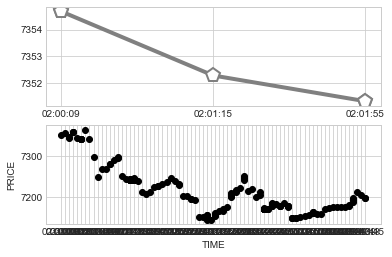

In [77]:
sell_03a = inputData[(inputData['DT'] > '2018-02-02') & (inputData['SELL'] == True)
                   & (inputData['TIME'] > '02:00:00')]
print("\n----- Sell 03 after 2 pm -----\n")
print(sell_03a.head())

buy_03a = inputData[(inputData['DT'] > '2018-02-02') & (inputData['SELL'] == False)
                  & (inputData['TIME'] > '02:00:00')]
print("\n----- Buy 03 after 2 pm -----\n")
print(buy_03a.head())

sell_02a = inputData[(inputData['DT'] < '2018-02-03') & (inputData['SELL'] == True)
                   & (inputData['TIME'] > '02:00:00')]
print("\n----- Sell 02 after 2 pm -----\n")
print(sell_02a.head())

x3 = sell_02a['TIME'].head()
y3 = sell_02a['PRICE'].head()

buy_02a = inputData[(inputData['DT'] < '2018-02-03') & (inputData['SELL'] == False)
                  & (inputData['TIME'] > '02:00:00')]
print("\n----- Buy 02 after 2 pm -----\n")
print(buy_02a.head())

x4 = buy_02a['TIME'].head(150)
y4 = buy_02a['PRICE'].head(150)

plt.figure()
fig, ax = plt.subplots(2)
ax[0].plot(x3, y3, '-p', color='gray', markersize=15, linewidth=4, 
           markerfacecolor='white', markeredgecolor='gray', markeredgewidth=2)
ax[1].plot(x4, y4, 'o', color='black')
plt.xlabel("TIME")
plt.ylabel("PRICE")

Text(0,0.5,'PRICE')

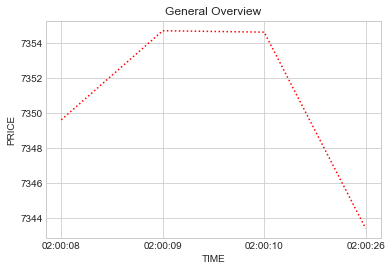

In [80]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

x = inputData['TIME'].head()
y6 = inputData['PRICE'].head()

plt.plot(x,y6,'-', label='price1',color='red', linestyle=':')
plt.axis('tight');
plt.title("General Overview")
plt.xlabel("TIME")
plt.ylabel("PRICE")

Text(0,0.5,'PRICE')

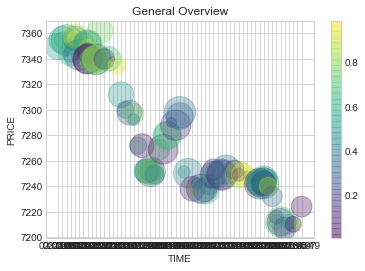

In [81]:
rng = np.random.RandomState(0)

x = inputData['TIME'].head(100)
y = inputData['PRICE'].head(100)

colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

plt.title("General Overview")
plt.xlabel("TIME")
plt.ylabel("PRICE")

Text(0,0.5,'FREQUENCY')

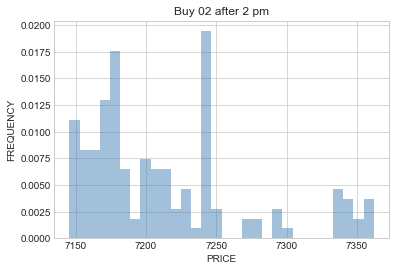

In [82]:
plt.hist(y4, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')

plt.title("Buy 02 after 2 pm")
plt.xlabel("PRICE")
plt.ylabel("FREQUENCY")

Text(0,0.5,'FREQUENCY')

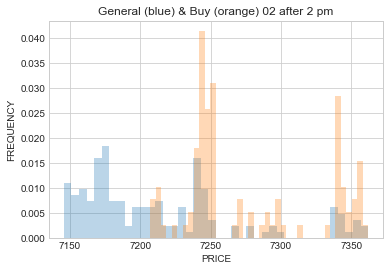

In [83]:
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(y4, **kwargs)
plt.hist(y, **kwargs)

y = inputData['PRICE'].head(100)
y4 = buy_02a['PRICE'].head(150)

plt.title("General (blue) & Buy (orange) 02 after 2 pm")
plt.xlabel("PRICE")
plt.ylabel("FREQUENCY")
